In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#import_libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import csv

In [3]:
#please mention data file name here
filename ='/content/drive/My Drive/Colab Notebooks/GaBP2/Model/descriptor_ABX2.csv' 
dataset = pd.read_csv(filename)
dataset

,compound,AM1,AN1,Period1,group1,First_IE1,Second_IE1,elctron_AF1,paulielctrneg1,Allen_electneg1,vand_rad1,cov_rad1,atom_rad1,metling1,boiling1,density1,molarVol1,heat_fus1,heat_vap1,thermal_con1,spec_heat1,AM2,AN2,Period2,group2,First_IE21,Second_IE12,elctron_AF2,paulielctrneg2,Allen_electneg2,vand_rad2,cov_rad2,atom_rad2,metling2,boiling2,density2,molarVol2,heat_fus2,heat_vap2,thermal_con2,spec_heat2,AM3,AN3,Period3,group3,First_IE3,Second_IE3,elctron_AF3,paulielctrneg3,Allen_electneg3,vand_rad3,cov_rad3,atom_rad3,metling3,boiling3,density3,molarVol3,heat_fus3,heat_vap3,thermal_con3,spec_heat3,ST,KT,CP,BandGap,Ksgap,Volume
0,ZnGeN2,65.390,30,4,12,906.4,1733.3,0.0,1.65,1.590,139,122,135,419.53,907,7.1330,0.000009,7.35,119,1.160,388,72.64,32,4,14,762.0,1537.5,-118.9,2.01,1.994,211,120,125,938.30,2833,5.323,0.000014,31.80,334,0.599,321.4,14.01,7,2,15,1402.3,2856.0,0.07,3.04,3.066,155,71,65,-210.10,-195.8,0.808,0.011197,0.36,2.79,0.00026,1040.0,1,0,0,2.44,1.76,181.389
1,ZnGeN2,65.390,30,4,12,906.4,1733.3,0.0,1.65,1.590,139,122,135,419.53,907,7.1330,0.000009,7.35,119,1.160,388,72.64,32,4,14,762.0,1537.5,-118.9,2.01,1.994,211,120,125,938.30,2833,5.323,0.000014,31.80,334,0.599,321.4,14.01,7,2,15,1402.3,2856.0,0.07,3.04,3.066,155,71,65,-210.10,-195.8,0.808,0.011197,0.36,2.79,0.00026,1040.0,0,1,0,3.02,2.15,181.833
2,ZnGeN2,65.390,30,4,12,906.4,1733.3,0.0,1.65,1.590,139,122,135,419.53,907,7.1330,0.000009,7.35,119,1.160,388,72.64,32,4,14,762.0,1537.5,-118.9,2.01,1.994,211,120,125,938.30,2833,5.323,0.000014,31.80,334,0.599,321.4,14.01,7,2,15,1402.3,2856.0,0.07,3.04,3.066,155,71,65,-210.10,-195.8,0.808,0.011197,0.36,2.79,0.00026,1040.0,0,0,1,2.73,1.95,181.565
3,AlGaN2,26.981,13,3,13,577.5,1816.7,-41.8,1.61,1.613,184,121,125,660.30,2470,2.6989,0.000010,10.70,293,2.370,904,69.72,31,4,13,578.8,1979.3,-40.0,1.81,1.756,187,122,130,29.76,2400,5.910,0.000012,5.59,256,0.406,371.0,14.01,7,2,15,1402.3,2856.0,0.07,3.04,3.066,155,71,65,-210.10,-195.8,0.808,0.011197,0.36,2.79,0.00026,1040.0,1,0,0,4.59,3.28,178.460
4,AlGaN2,26.981,13,3,13,577.5,1816.7,-41.8,1.61,1.613,184,121,125,660.30,2470,2.6989,0.000010,10.70,293,2.370,904,69.72,31,4,13,578.8,1979.3,-40.0,1.81,1.756,187,122,130,29.76,2400,5.910,0.000012,5.59,256,0.406,371.0,14.01,7,2,15,1402.3,2856.0,0.07,3.04,3.066,155,71,65,-210.10,-195.8,0.808,0.011197,0.36,2.79,0.00026,1040.0,0,1,0,4.63,3.31,178.365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,ZnSnSb2,65.390,30,4,12,906.4,1733.3,0.0,1.65,1.590,139,122,135,419.53,907,7.1330,0.000009,7.35,119,1.160,388,118.70,50,5,14,708.6,1411.8,-107.0,1.96,1.824,217,139,145,231.93,2602,7.310,0.000016,7.00,290,0.666,217.0,121.80,51,5,15,834.0,1594.9,-101.00,2.05,1.984,206,139,145,630.63,1635.0,6.690,0.000018,19.70,67.00,0.24300,207.0,0,1,0,0.05,0.04,493.833
95,ZnSnSb2,65.390,30,4,12,906.4,1733.3,0.0,1.65,1.590,139,122,135,419.53,907,7.1330,0.000009,7.35,119,1.160,388,118.70,50,5,14,708.6,1411.8,-107.0,1.96,1.824,217,139,145,231.93,2602,7.310,0.000016,7.00,290,0.666,217.0,121.80,51,5,15,834.0,1594.9,-101.00,2.05,1.984,206,139,145,630.63,1635.0,6.690,0.000018,19.70,67.00,0.24300,207.0,0,0,1,0.04,0.03,494.125
96,CdSnSb2,112.400,48,5,12,867.8,1631.4,70.0,1.69,1.520,158,144,155,321.07,767,8.6500,0.000013,6.30,100,0.968,230,118.70,50,5,14,708.6,1411.8,-107.0,1.96,1.824,217,139,145,231.93,2602,7.310,0.000016,7.00,290,0.666,217.0,121.80,51,5,15,834.0,1594.9,-101.00,2.05,1.984,206,139,145,630.63,1635.0,6.690,0.000018,19.70,67.00,0.24300,207.0,1,0,0,0.06,0.04,544.101
97,CdSnSb2,112.400,48,5,12,867.8,1631.4,70.0,1.69,1.520,158,144,155,321.07,767,8.6500,0.000013,6.30,100,0.968,230,118.70,50,5,14,708.6,1411.8,-107.0,1.96,1.824,217,139,145,231.93,2602,7.310,0.000016,7.00,290,0.666,217.0,121.80,51,5,15,834.0,1594.9,-101.00,2.05,1.984,206,139,145,630.

In [5]:
dataset.shape

(99, 67)

In [7]:
dataset.keys()

Index(['compound', 'AM1', 'AN1', 'Period1', 'group1', 'First_IE1',
       'Second_IE1', 'elctron_AF1', 'paulielctrneg1  ', 'Allen_electneg1',
       'vand_rad1', 'cov_rad1', 'atom_rad1', 'metling1', 'boiling1',
       'density1', 'molarVol1', 'heat_fus1', 'heat_vap1', 'thermal_con1',
       'spec_heat1', 'AM2', 'AN2', 'Period2', 'group2', 'First_IE21',
       'Second_IE12', 'elctron_AF2', 'paulielctrneg2', 'Allen_electneg2',
       'vand_rad2', 'cov_rad2', 'atom_rad2', 'metling2', 'boiling2',
       'density2', 'molarVol2', 'heat_fus2', 'heat_vap2', 'thermal_con2',
       'spec_heat2', 'AM3', 'AN3', 'Period3', 'group3', 'First_IE3',
       'Second_IE3', 'elctron_AF3', 'paulielctrneg3  ', 'Allen_electneg3',
       'vand_rad3', 'cov_rad3', 'atom_rad3', 'metling3', 'boiling3',
       'density3', 'molarVol3', 'heat_fus3', 'heat_vap3', 'thermal_con3',
       'spec_heat3', 'ST', 'KT', 'CP', 'BandGap', 'Ksgap', 'Volume'],
      dtype='object')

In [0]:
### check if any data is missing
dataset.isna().sum() 
### remove the line with missing data if any 
dataset = dataset.dropna()


We have droped 4 features 67-4 = 63

In [0]:
#Remove the column with only text  and target column in X_1 by using their header
X_1 = dataset.drop(['compound','BandGap','Ksgap','Volume'], axis=1)
#mention the column header of target here
Y = dataset['BandGap']
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X = preprocessing.scale(X_1)
for n in range (1,200,1):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=n)
        from sklearn.cross_decomposition import PLSRegression
        model = PLSRegression(n_components=18)
        model.fit(X_train, Y_train)
     ## ## model evaluation for training set
        from sklearn.metrics import mean_squared_error
        from sklearn.metrics import r2_score
        y_train_predict = model.predict(X_train)
        rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
        r2 = r2_score(Y_train, y_train_predict)
        y_test_predict = model.predict(X_test)
        rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
        r2_test = r2_score(Y_test, y_test_predict)
        with open('out.csv', mode='a') as out_file:
            out_writer = csv.writer(out_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)      
            out_writer.writerow(['%s' %n, '{}'.format(rmse) ,'{}'.format(r2), '{}'.format(rmse_test), '{}'.format(r2_test)])
            out_file.close()
        from shutil import copyfile
        copyfile('out.csv', 'cross-validation-out.csv')

/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/pls_.py:322: UserWarning: X scores are null at iteration 11
  warnings.warn('X scores are null at iteration %s' % k)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/pls_.py:322: UserWarning: X scores are null at iteration 11
  warnings.warn('X scores are null at iteration %s' % k)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/pls_.py:322: UserWarning: X scores are null at iteration 11
  warnings.warn('X scores are null at iteration %s' % k)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/pls_.py:322: UserWarning: X scores are null at iteration 11
  warnings.warn('X scores are null at iteration %s' % k)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/pls_.py:322: UserWarning: X scores are null at iteration 11
  warnings.warn('X scores are null at iteration %s' % k)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/pls_.py:322: 

In [0]:
###here we import the out.csv file and printthe statistics

data_stat=pd.read_csv('out.csv',  names = ["RMSE-Train", "R^square train", "RMSE-test", "R^square test"])  
print(data_stat.describe())
data_stat.describe().to_csv("stat-results.csv")


       RMSE-Train  R^square train   RMSE-test  R^square test
count  199.000000      199.000000  199.000000     199.000000
mean     0.562233        0.806277    0.657405       0.720515
std      0.039162        0.017380    0.113701       0.089623
min      0.424761        0.764802    0.383547       0.187627
25%      0.542697        0.794697    0.587589       0.686353
50%      0.567103        0.804503    0.648843       0.731138
75%      0.589689        0.816529    0.722371       0.775997
max      0.632957        0.866969    0.989725       0.901450


In [0]:
#Removing out.csv file
try:
    os.remove("out.csv")
except OSError:
    pass

In [0]:
############ This section of the script is for an individual random state 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=3)


In [0]:
#####Define the regression model here
model = model
model.fit(X_train, Y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/pls_.py:322: UserWarning: X scores are null at iteration 11
  warnings.warn('X scores are null at iteration %s' % k)


PLSRegression(copy=True, max_iter=500, n_components=18, scale=True, tol=1e-06)

In [0]:
##### model evaluation for training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.538235224518665
R2 score is 0.7890902068261811


In [0]:
# model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))

The model performance for testing set
--------------------------------------
RMSE is 0.7417453273573074
R2 score is 0.777863925936206


In [0]:
######printing coefficient of the regression
print(X_1.columns.values.tolist())
try:
    print(model.dual_coef_)    
except AttributeError:
    pass
try:
    print(model.coef_)
except AttributeError:
    pass
try:
    print(model.feature_importances_.T)
except AttributeError:
    pass

['AM1', 'AN1', 'Period1', 'group1', 'First_IE1', 'Second_IE1', 'elctron_AF1', 'paulielctrneg1  ', 'Allen_electneg1', 'vand_rad1', 'cov_rad1', 'atom_rad1', 'metling1', 'boiling1', 'density1', 'molarVol1', 'heat_fus1', 'heat_vap1', 'thermal_con1', 'spec_heat1', 'AM2', 'AN2', 'Period2', 'group2', 'First_IE21', 'Second_IE12', 'elctron_AF2', 'paulielctrneg2', 'Allen_electneg2', 'vand_rad2', 'cov_rad2', 'atom_rad2', 'metling2', 'boiling2', 'density2', 'molarVol2', 'heat_fus2', 'heat_vap2', 'thermal_con2', 'spec_heat2', 'AM3', 'AN3', 'Period3', 'group3', 'First_IE3', 'Second_IE3', 'elctron_AF3', 'paulielctrneg3  ', 'Allen_electneg3', 'vand_rad3', 'cov_rad3', 'atom_rad3', 'metling3', 'boiling3', 'density3', 'molarVol3', 'heat_fus3', 'heat_vap3', 'thermal_con3', 'spec_heat3', 'ST', 'KT', 'CP']
[[-0.04008808]
 [-0.04121414]
 [-0.04118851]
 [ 0.02890331]
 [-0.02808046]
 [ 0.00776192]
 [-0.02643287]
 [-0.04465861]
 [-0.0019369 ]
 [ 0.02128724]
 [-0.02066293]
 [-0.02947787]
 [ 0.05203673]
 [ 0.0304

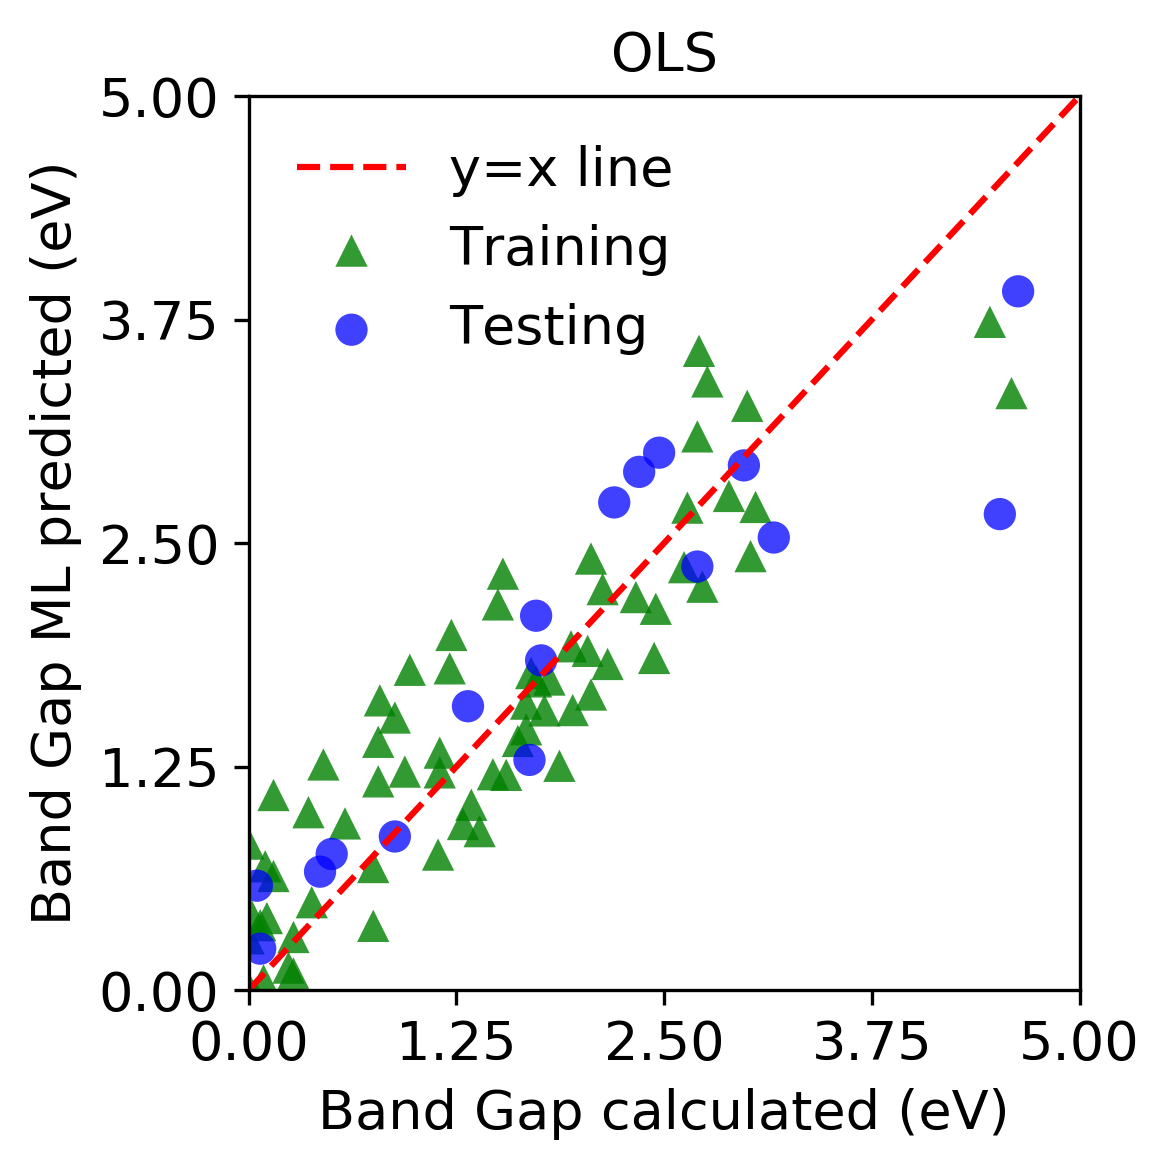

In [0]:
#### define your data plot here       
plt.figure(figsize=(4,4),dpi=300)
plt.title('OLS', fontsize=13) 
#### define your data plot here       
plt.xlim((0,5))
plt.xticks(np.linspace(0,5,5,endpoint=True))
plt.ylim((0,5))
plt.yticks(np.linspace(0,5,5,endpoint=True))
plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(Y_train, y_train_predict, label='Training',facecolors='green',alpha=0.8, edgecolors='none',s=60,marker='^')
plt.scatter(Y_test, y_test_predict, label='Testing',facecolors='blue',alpha=0.75, edgecolors='none',s=60, marker='o')
plt.xlabel("Band Gap calculated (eV)",fontsize=13)
plt.ylabel("Band Gap ML predicted (eV)",fontsize=13)

#####fitting with a y=x line here (polynomial approach)
#p1 = np.polyfit(Y_train, y_train_predict,1)
plt.plot((0,5),(0,5), 'r-',linestyle='dashed',label='y=x line')
plt.tight_layout()
plt.legend(loc=2, prop={'size': 13}, frameon=False)
#plt.text(1, -1, 'RMSE=0.19 eV \n R$^2$=0.96',fontsize=13)
plt.savefig ('OLS.png')
plt.show()